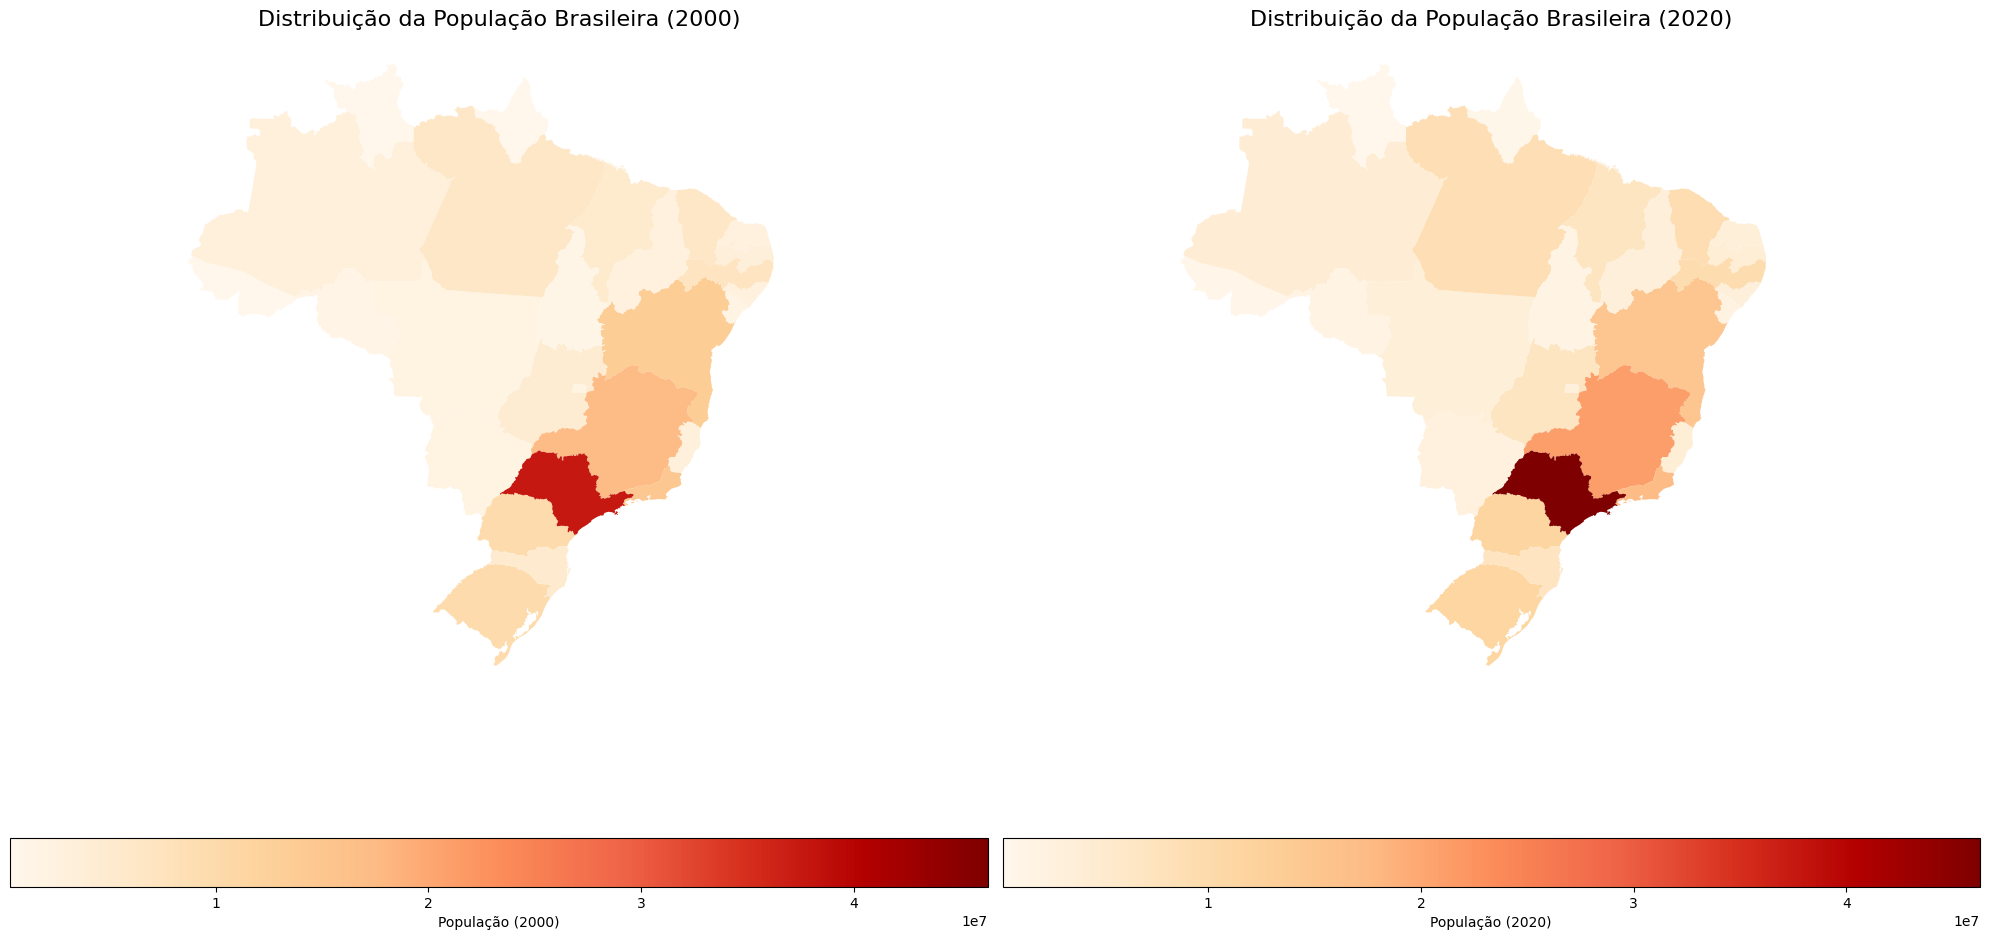

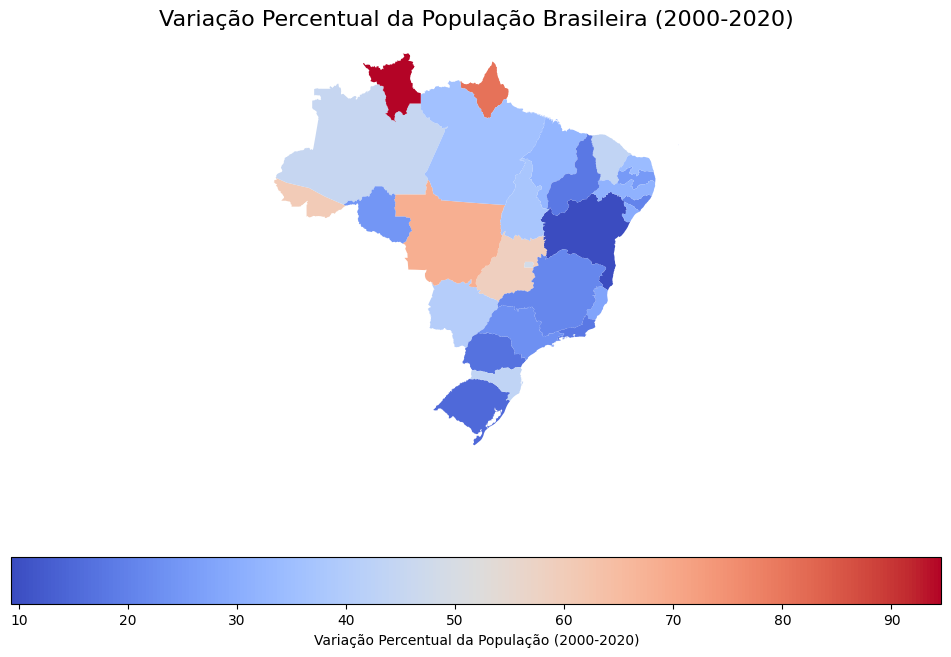

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Função para carregar dados populacionais
def carregar_dados_populacionais():
    # Dados de população por estado para 2000 e 2020
    dados = {
        "Estado": [
            "Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins",
            "Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba", "Pernambuco",
            "Alagoas", "Sergipe", "Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro",
            "São Paulo", "Paraná", "Santa Catarina", "Rio Grande do Sul", "Mato Grosso do Sul",
            "Mato Grosso", "Goiás", "Distrito Federal"
        ],
        "População_2000": [
            1444912, 557526, 2898303, 324397, 6395864, 477032, 1155948, 5372620, 2777676,
            6387857, 2636416, 3235151, 7312821, 2778988, 1784775, 13605891, 17472225,
            3143714, 14695396, 37601266, 9848406, 5055651, 9935105, 1998599, 2092609,
            4479006, 2058252
        ],
        "População_2020": [
            1796460, 894470, 4207714, 631181, 8690745, 861773, 1590248, 7114598, 3281480,
            9187103, 3534165, 4059905, 9616621, 3351543, 2318822, 14873064, 21168791,
            4018650, 17366189, 46289333, 11516840, 7252502, 11422973, 2809394, 3526220,
            7113540, 3055149
        ]
    }
    df = pd.DataFrame(dados)
    # Calcular variação percentual entre 2000 e 2020
    df["Variação (%)"] = ((df["População_2020"] - df["População_2000"]) / df["População_2000"]) * 100
    return df

# Função para carregar o shapefile dos estados
def carregar_shapefile():
    try:
        # URL do GeoJSON
        url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
        local_path = "brazil-states.geojson"  # Caminho local para salvar o arquivo

        # Baixar o arquivo
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_path, "wb") as f:
                f.write(response.content)
        else:
            print(f"Erro ao baixar o GeoJSON: {response.status_code}")
            return None

        # Ler o arquivo localmente com GeoPandas
        estados = gpd.read_file(local_path)
        estados.rename(columns={"name": "Estado"}, inplace=True)  # Renomear coluna
        return estados
    except Exception as e:
        print(f"Erro ao carregar o shapefile: {e}")
        return None

# Função para plotar os mapas em subplots
def plotar_mapas(estados, dados):
    estados_merged = estados.merge(dados, on="Estado")

    # Determinar limites globais para a escala de cores (valores absolutos)
    vmin_abs = estados_merged[["População_2000", "População_2020"]].min().min()
    vmax_abs = estados_merged[["População_2000", "População_2020"]].max().max()

    # Criar subplots para valores absolutos
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 linha, 2 colunas
    anos = [2000, 2020]
    colunas_populacao = ["População_2000", "População_2020"]

    for i, ax in enumerate(axes):
        estados_merged.plot(
            column=colunas_populacao[i],
            ax=ax,
            legend=True,
            cmap="OrRd",
            vmin=vmin_abs,
            vmax=vmax_abs,
            legend_kwds={"label": f"População ({anos[i]})", "orientation": "horizontal"}
        )
        ax.set_title(f"Distribuição da População Brasileira ({anos[i]})", fontsize=16)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Função para plotar o mapa da variação percentual
def plotar_mapa_variacao(estados, dados):
    estados_merged = estados.merge(dados, on="Estado")

    # Determinar limites globais para a escala de cores (variação percentual)
    vmin = estados_merged["Variação (%)"].min()
    vmax = estados_merged["Variação (%)"].max()

    # Criar figura
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    estados_merged.plot(
        column="Variação (%)",
        ax=ax,
        legend=True,
        cmap="coolwarm",
        vmin=vmin,
        vmax=vmax,
        legend_kwds={'label': "Variação Percentual da População (2000-2020)", 'orientation': "horizontal"}
    )
    ax.set_title("Variação Percentual da População Brasileira (2000-2020)", fontsize=16)
    ax.axis("off")
    plt.show()

# Fluxo principal
def main():
    # Carregar dados populacionais e shapefile
    dados_populacionais = carregar_dados_populacionais()
    estados = carregar_shapefile()
    if estados is not None:
        # Plotar mapas de valores absolutos e variação percentual
        plotar_mapas(estados, dados_populacionais)
        plotar_mapa_variacao(estados, dados_populacionais)

if __name__ == "__main__":
    main()
